In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from sklearn.model_selection import KFold
import tqdm

from model.dataset import Combined
from model.calc_nse import calc_nse
from model.lstm import Model1
from model.nseloss import NSELoss
from model.train import train_epoch, eval_model

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
met_id = 'meteo_hokota'
swat_id = 'swatout'
obs_id = 'day_mean_COD'
seq_len = 365
learning_rate = 1e-3

tr_start = pd.to_datetime("2002-06-01", format="%Y-%m-%d")
tr_end = pd.to_datetime("2017-05-31", format="%Y-%m-%d")
test_start = pd.to_datetime("2017-06-01", format="%Y-%m-%d")
test_end = pd.to_datetime("2022-05-31", format="%Y-%m-%d")

ds = Combined(met_id, swat_id, obs_id, seq_len=seq_len, dates=[tr_start, tr_end], period='train')
ds_test = Combined(met_id, swat_id, obs_id, seq_len=seq_len, dates=[test_start, test_end], period='test')

loss_func = NSELoss()
split = KFold(n_splits=5, shuffle=True, random_state=1)

In [3]:
best_NSE = -100
epochs = 20
for fold, (tr_idx, val_idx) in enumerate(split.split(ds)):
    tqdm.tqdm.write(f"Fold: {fold + 1}")

    tr_loader = DataLoader(ds, batch_size=256, sampler=SubsetRandomSampler(tr_idx))
    val_loader = DataLoader(ds, batch_size=2048, sampler=SubsetRandomSampler(val_idx))

    model = Model1().to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    loss_func = NSELoss().to(DEVICE)

    for i in range(epochs):
        train_epoch(model, optimizer, tr_loader, loss_func, DEVICE, i + 1)

        obs, preds = eval_model(model, val_loader, DEVICE)

        preds = ds.rescale(preds.cpu().numpy(), variable='outputs')
        obs = ds.rescale(obs.cpu().numpy(), variable='outputs')
        nse = calc_nse(obs, preds)
        # Todo: save models
        if nse >= best_NSE:
            best = model.state_dict()
            best_NSE = nse

        tqdm.tqdm.write(f"Validation NSE: {nse:.2f}")

Fold: 1


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.13


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.40


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.47


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.49


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.52


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.56


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.56


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.62


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.66


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.67


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.69


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.68


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.70


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.72


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.73


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.75


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.76


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.76


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.80


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.80
Fold: 2


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.19


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.47


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.54


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.55


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.57


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.61


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.64


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.66


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.68


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.68


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.71


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.73


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.72


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.75


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.77


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.76


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.78


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.79


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.81


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.81
Fold: 3


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.22


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.33


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.37


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.42


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.51


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.56


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.58


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.63


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.61


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.65


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.66


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.64


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.64


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.69


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.71


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.71


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.73


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.74


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.76


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.77
Fold: 4


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: -0.00


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.21


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.37


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.46


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.51


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.54


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.57


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.61


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.62


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.65


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.64


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.63


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.66


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.68


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.69


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.69


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.72


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.75


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.73


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.76
Fold: 5


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.13


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.33


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.48


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.53


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.56


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.60


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.64


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.67


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.67


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.68


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.69


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.73


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.74


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.75


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.76


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.77


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.78


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.64


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.74


  0%|          | 0/17 [00:00<?, ?it/s]

Validation NSE: 0.77


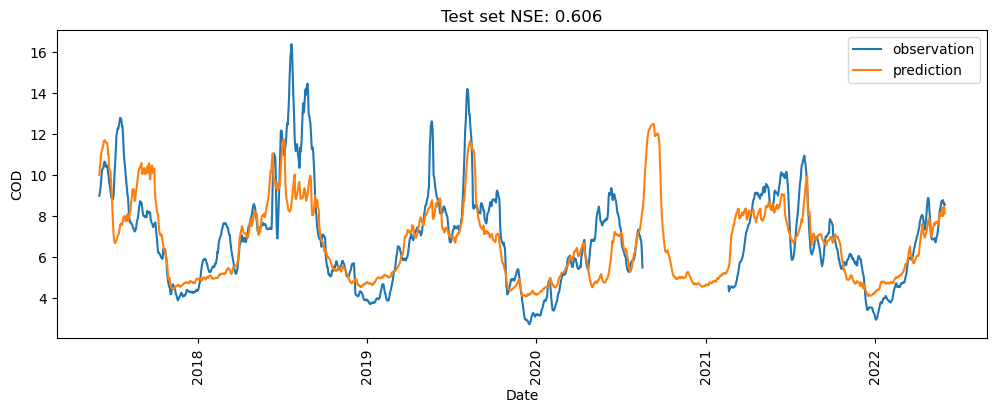

In [4]:
import matplotlib.pyplot as plt

test_loader = DataLoader(ds_test, batch_size=2048, shuffle=False)
model = Model1().to(DEVICE)
model.load_state_dict(best)

obs, preds = eval_model(model, test_loader, DEVICE)
preds = ds_test.rescale(preds.cpu().numpy(), variable='outputs')
obs = ds_test.rescale(obs.cpu().numpy(), variable='outputs')
nse = calc_nse(obs, preds)

start_date = ds_test.dates[0]
end_date = ds_test.dates[1] + pd.DateOffset(days=1)
date_range = pd.date_range(start_date, end_date)
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(date_range, obs, label="observation")
ax.plot(date_range, preds, label="prediction")
ax.legend()
ax.set_title(f"Test set NSE: {nse:.3f}")
ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("Date")
_ = ax.set_ylabel("COD")